In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/anushishah/heart_disease_UCI/refs/heads/main/heart_disease_UCI.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Shape of data
df.shape

(918, 12)

In [5]:
# Number of unique values
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [6]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [7]:
# Check for duplicated values
df.duplicated().sum()


np.int64(0)

In [8]:
# Check for numerical features in the dataset
features_numerical = df.select_dtypes(include=['int64', 'float64'])
features_numerical


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [9]:
# Check for numerical and categorical features in the dataset

features_categorical = df.select_dtypes(include=['object'])
features_categorical

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [10]:
# Here, HeartDisease is the target variable with 0 and 1 values.
# Obtain counts for target variable.

df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [49]:
pd.crosstab(df.HeartDisease, df.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


In [11]:
# Summary statistics
#df.describe()

# Summary statistics for normal people
df[df['HeartDisease']==0].describe()

df_normal = df[df['HeartDisease']==0]


In [12]:
# Summary statistics for heart disease people

df[df['HeartDisease']==1].describe()
df_heart = df[df['HeartDisease']==1]

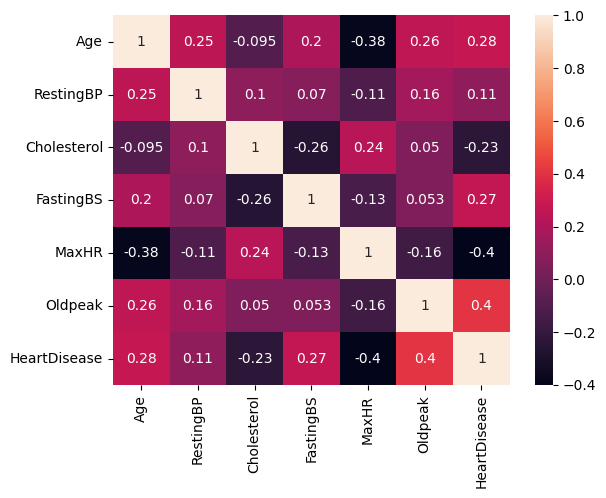

In [13]:
# Check correlation between numerical features
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

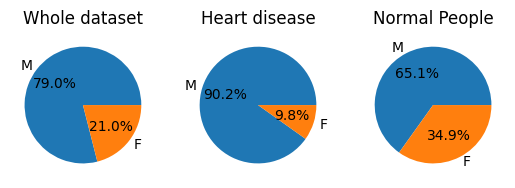

In [17]:
# Sex distrubution

plt.subplot(1,3,1)
plt.pie(df['Sex'].value_counts(),labels=['M','F'],autopct='%1.1f%%')
plt.title('Whole dataset')

plt.subplot(1,3,2)
plt.pie(df_heart['Sex'].value_counts(),labels=['M','F'],autopct='%1.1f%%')
plt.title('Heart disease')

plt.subplot(1,3,3)
plt.pie(df_normal['Sex'].value_counts(),labels=['M','F'],autopct='%1.1f%%')
plt.title('Normal People')

plt.show()


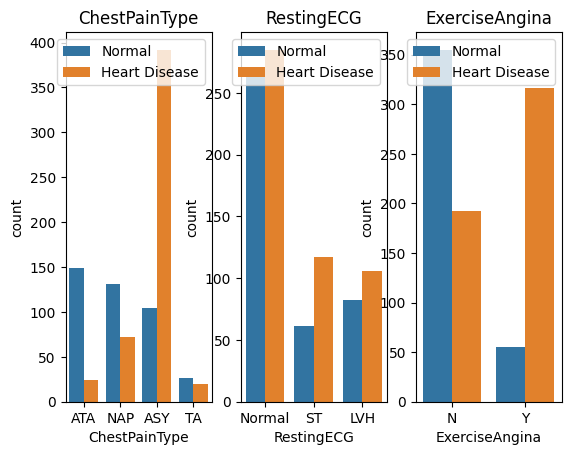

In [18]:
## Subplots example 1

plt.subplot(1,3,1)
sns.countplot(x='ChestPainType', data=df, hue='HeartDisease')
plt.legend(['Normal', 'Heart Disease'])
plt.title('ChestPainType')

plt.subplot(1,3,2)
sns.countplot(x='RestingECG', data=df, hue='HeartDisease')
plt.legend(['Normal', 'Heart Disease'])
plt.title('RestingECG')

plt.subplot(1,3,3)
sns.countplot(x='ExerciseAngina', data=df, hue='HeartDisease')
plt.legend(['Normal', 'Heart Disease'])
plt.title('ExerciseAngina')

plt.show()


/tmp/ipython-input-1098428771.py:20: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  fig.legend([axes[0,0], axes[0,1],axes[1,0],axes[1,1]], labels=labels,loc="center left", bbox_to_anchor=(1.0, 0.5))


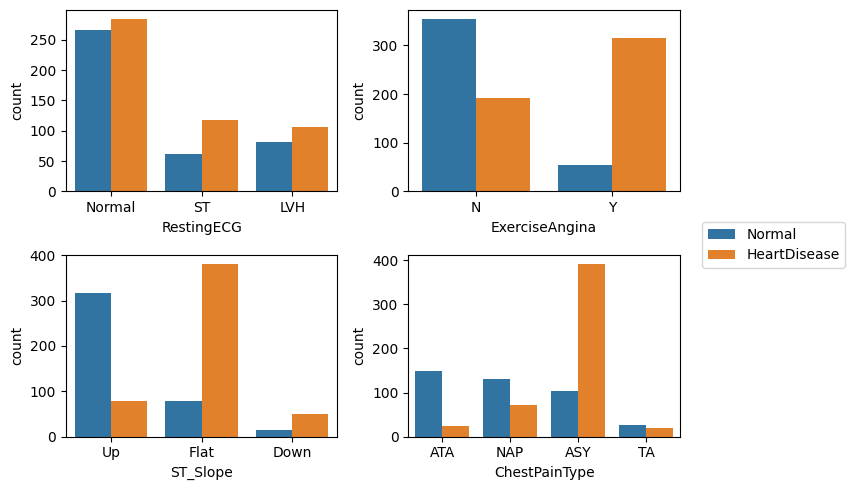

In [19]:
## Subplots example 2
## Categorical features

fig, axes = plt.subplots(2, 2, figsize=(7, 5))
labels = ['Normal','HeartDisease']

sns.countplot(x='RestingECG', data=df, hue='HeartDisease', ax=axes[0,0], legend=False)
#axes[0,0].set_title("RestingECG")

sns.countplot(x='ExerciseAngina', data=df, hue='HeartDisease',ax=axes[0,1], legend=False)
#axes[0,1].set_title("ExerciseAngina")

sns.countplot(x='ST_Slope', data=df, hue='HeartDisease',ax=axes[1,0], legend=False)
#axes[1,0].set_title("ST_Slope")

sns.countplot(x='ChestPainType', data=df, hue='HeartDisease',ax=axes[1,1], legend=False)
#axes[1,1].set_title("ChestPainType")


fig.legend([axes[0,0], axes[0,1],axes[1,0],axes[1,1]], labels=labels,loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

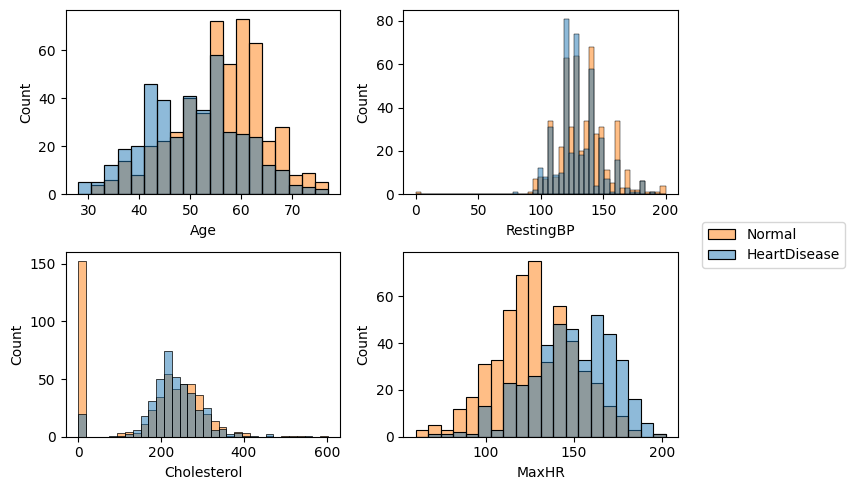

In [44]:
## Subplots example
## Numerical features

fig, axes = plt.subplots(2, 2, figsize=(7, 5))
labels = ['Normal','HeartDisease']

#sns.countplot(x='RestingECG', data=df, hue='HeartDisease', ax=axes[0,0], legend=False)
sns.histplot(x='Age', data=df, hue='HeartDisease', ax=axes[0,0], legend=False)
#axes[0,0].set_title("Age")

sns.histplot(x='RestingBP', data=df, hue='HeartDisease',ax=axes[0,1], legend=False)
#axes[0,1].set_title("RestingBP")

sns.histplot(x='Cholesterol', data=df, hue='HeartDisease',ax=axes[1,0], legend=False)
#axes[1,0].set_title("Cholesterol")

sns.histplot(x='MaxHR', data=df, hue='HeartDisease',ax=axes[1,1], legend=False)
#axes[1,1].set_title("MaxHR")

fig.legend(labels=labels,loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()


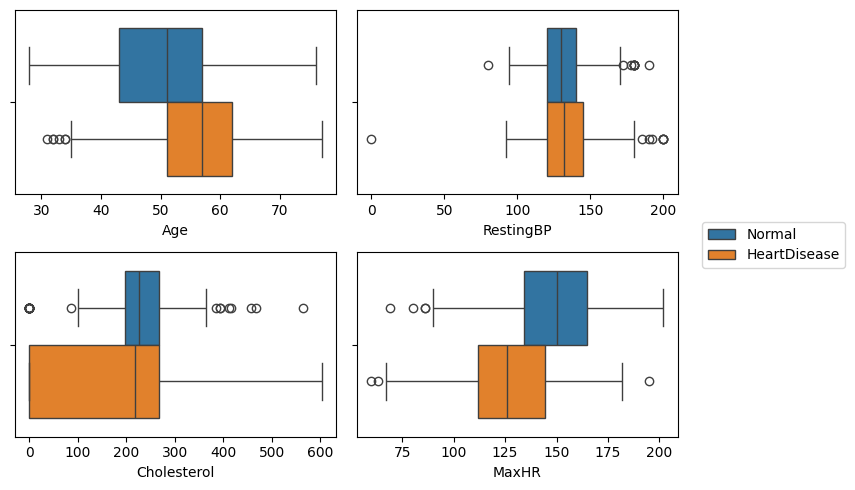

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(7,5))
labels = ['Normal','HeartDisease']

sns.boxplot(x='Age', data=df, hue='HeartDisease', ax=axes[0,0], legend=False)
sns.boxplot(x='RestingBP', data=df, hue='HeartDisease',ax=axes[0,1], legend=False)
sns.boxplot(x='Cholesterol', data=df, hue='HeartDisease',ax=axes[1,0], legend=False)
sns.boxplot(x='MaxHR', data=df, hue='HeartDisease',ax=axes[1,1], legend=False)

fig.legend(loc="center left",bbox_to_anchor=(1.0, 0.5),labels=labels)

plt.tight_layout()
plt.show()



<Axes: xlabel='Age', ylabel='RestingBP'>

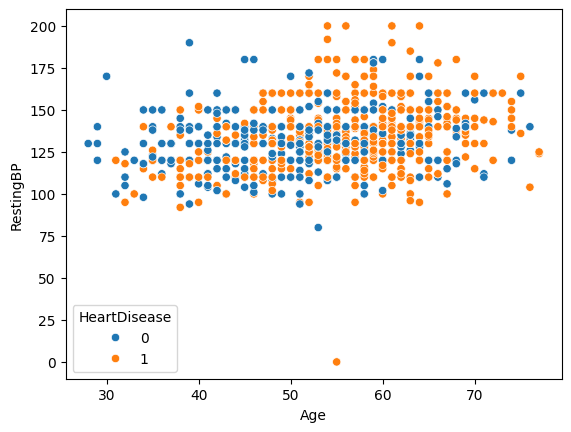

In [48]:
## Bivariate analysis : Scatter plots

sns.scatterplot(x="Age", y="RestingBP", hue='HeartDisease',data=df)
